In [1]:
import time
import datetime
import pandas as pd
import yfinance 
import statistics

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def date_to_sec(date):
    i = str(date).split('-')
    return int(time.mktime(datetime.datetime(int(i[0]), int(i[1]), int(i[2]), 0).timetuple()))

In [4]:
# Gets historical Stock price data from yahoo finance. 
# Imputs: ticker - the stock ticker. String. 1-4 characters.
#         time_period - the time, in days history back from the present that data should be retrived. Int.
# output: a pandas dataframe.
def get_historical_data(ticker, time_period):
    period2 = int(time.mktime(datetime.date.today().timetuple()))
    period1 = int(time.mktime(datetime.date.today().timetuple())) - 3600*24*7*time_period
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string) 
    df['Time'] = df['Date'].apply(date_to_sec)
    df.drop(columns ='Date', inplace = True)
    return df
    

In [5]:
plt.scatter(df['Time'], df['Open'])
plt.scatter(df['Time'], df['Close'])

NameError: name 'df' is not defined

In [28]:
df.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

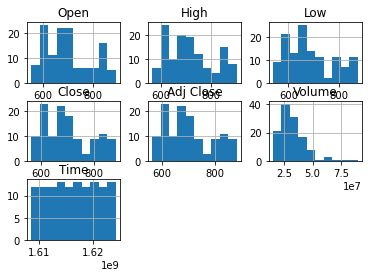

In [29]:
df.hist()

In [6]:
X = pd.DataFrame(df['Time'])
y = pd.DataFrame(df['Open'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

NameError: name 'df' is not defined

In [7]:
ticker = 'TSLA'
period = 300
df = get_historical_data(ticker, period)

# Inputs: lookback: the maximum number of weeks backwards from today that the function should look at. 
#         df: the dataframe with the stock data on it.
# Outputs: tuple: [of days backwards the model uses, mean R^2]
#
def find_best_lin_reg(lookback, df):
    starttime = int(time.mktime(datetime.datetime.now().timetuple()))
    #stores the max mean adjusted R^2 found, and the number of weeks back it was aquired.
    maxscore = [0, 0]
    for l in range(10, lookback+1):
        #cuts out all data that is outside of the timeframe the given model is looking at.
        df2 = df[df.Time >= (int(time.mktime(datetime.date.today().timetuple())) - 3600*24*7*l)]
        # sets the dependent and independent variables.
        X = pd.DataFrame(df2['Time'])
        y = pd.DataFrame(df2.drop(columns='Time'))
        #selects the model to be used.
        model = LinearRegression()
        #stores the adjusted R^2 values for each k fold.
        scores = []
        # folds that dough, fits the model, etc.
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        for i, (train, test) in enumerate(kfold.split(X, y)):
         model.fit(X.iloc[train,:], y.iloc[train,:])
         #calculates the ADJUSTED R^2.
         score = 1 - ( 1-model.score(X.iloc[test,:], y.iloc[test,:]) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
         scores.append(score)
        #prints out what the mean score was so I know what the fuck is going on.
        print(str(l) +", "+str(statistics.mean(scores)))
        # If it's the best score, keep it.
        if statistics.mean(scores) >= maxscore[0]:
            maxscore[0] = statistics.mean(scores)
            maxscore[1] = l
    endtime = int(time.mktime(datetime.datetime.now().timetuple()))
    print("Total time: "+str(endtime-starttime)+" seconds")
    return maxscore

print(find_best_lin_reg(period, df))

10, 0.02561638460457923
11, -0.02188829928660781
12, -0.20300298894835733
13, -0.10998367531561921
14, 0.048878545484867954
15, 0.09793624063886179
16, 0.08771492270564674
17, 0.06768173354461182
18, 0.08362967122812485
19, 0.06280513876288392
20, 0.05889841626442072
21, 0.13822145641605763
22, 0.1680395378712917
23, 0.22539375148973362
24, 0.3281591423766876
25, 0.3777688341021081
26, 0.4291536402193427
27, 0.4646430754451727
28, 0.41745278724584944
29, 0.35820886916451594
30, 0.25483317630418495
31, 0.18987748782249778
32, 0.10593961640620064
33, 0.041852207477078664
34, 0.02723035412149725
35, -0.0035341547576601315
36, -0.012682527605254013
37, 0.021296292062538875
38, 0.06775829109022302
39, 0.08886713366779257
40, 0.10315407689556584
41, 0.15009072704945733
42, 0.16250838805477608
43, 0.21049416867949547
44, 0.23090144321843095
45, 0.2606138843846809
46, 0.29104277247062793
47, 0.3180113237008308
48, 0.3593563768998457
49, 0.3733688113056807
50, 0.4060315043087735
51, 0.439706300

In [8]:
# testing adjusted R^2
ticker = 'TSLA'
lookback = 300
period = 3600*24*7*lookback
interval = '1d'
df = get_historical_data(ticker, period)
X = pd.DataFrame(df['Time'])
y = pd.DataFrame(df['Open'])
model = LinearRegression()
adjscores = []
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 adjscore = 1 - ( 1-model.score(X.iloc[test,:], y.iloc[test,:]) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
 scores.append(score)
 scores.append(score)
print(scores)
print(adjscores)

[0.36638116668799536, 0.36638116668799536, 0.37863659875110534, 0.37863659875110534, 0.3745700707330676, 0.3745700707330676]
[]


In [25]:
# testing using all data
ticker = 'TSLA'
lookback = 300
period = 3600*24*7*lookback
interval = '1d'
df = get_historical_data(ticker, period)


In [26]:
df

,Open,High,Low,Close,Adj Close,Volume,Time
0,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,1277787600
1,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,1277874000
2,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,1277960400
3,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,1278046800
4,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,1278392400
...,...,...,...,...,...,...,...
2762,613.369995,628.349976,611.799988,623.309998,623.309998,24528400,1623992400
2763,624.479980,631.390015,608.880005,620.830017,620.830017,24812700,1624251600
2764,618.250000,628.570007,615.500000,623.710022,623.710022,19158900,1624338000
2765,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,1624424400


In [27]:
X = pd.DataFrame(df['Time'])
y = pd.DataFrame(df.drop(columns='Time'))
model = LinearRegression()
adjscores = []
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 adjscore = 1 - ( 1-model.score(X.iloc[test,:], y.iloc[test,:]) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
 scores.append(score)
 adjscores.append(adjscore)
print(scores)
print(adjscores)

[0.3615631563450486, 0.33981720305329804, 0.34337736784698736]
[0.3613322569440883, 0.3395784389314366, 0.3431398913073299]


In [41]:
def recursive_column_outputer(df, maxscore):
    for column in reversed(df.columns):
        if len(df) > 1:
            if column != 'Time':
                X = pd.DataFrame(df['Time'])
                y = pd.DataFrame(df.drop(columns=['Time',str(column)]))
                model = LinearRegression()
                scores = []
                kfold = KFold(n_splits=3, shuffle=True, random_state=42)
                for i, (train, test) in enumerate(kfold.split(X, y)):
                    model.fit(X.iloc[train,:], y.iloc[train,:])
                    score = 1 - ( 1-model.score(X.iloc[test,:], y.iloc[test,:]) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
                    scores.append(score)
                if statistics.mean(scores) >= maxscore[0]:
                    maxscore[0] = statistics.mean(scores)
                    maxscore[1] = l
                    maxscore[2] = df2.drop(columns=['Time',str(column)].columns



SyntaxError: unexpected EOF while parsing (<ipython-input-41-a5dcd67ca656>, line 18)

In [9]:
ticker = 'TSLA'
period = 300
df = get_historical_data(ticker, period)

# Inputs: lookback: the maximum number of weeks backwards from today that the function should look at. 
#         df: the dataframe with the stock data on it.
# Outputs: tuple: [of days backwards the model uses, mean R^2]
#
def find_best_lin_reg(lookback, df):
    starttime = int(time.mktime(datetime.datetime.now().timetuple()))
    #stores the max mean adjusted R^2 found, and the number of weeks back it was aquired.
    maxscore = [0, 0]
    for l in range(10, lookback+1):
        #cuts out all data that is outside of the timeframe the given model is looking at.
        df2 = df[df.Time >= (int(time.mktime(datetime.date.today().timetuple())) - 3600*24*7*l)]
        for column in reversed(df2.columns):
            print(column)
    endtime = int(time.mktime(datetime.datetime.now().timetuple()))
    print("Total time: "+str(endtime-starttime)+" seconds")
    return maxscore

print(find_best_lin_reg(period, df))

Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
High
Open
Time
Volume
Adj Close
Close
Low
Hi